In [ ]:
print('hello, world')

hello, world


In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = 'chapter02/datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing' + '/housing.tgz'


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    print(housing_url)
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    print(tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

fetch_housing_data()


https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


chapter02/datasets/housing/housing.tgz


In [ ]:
import pandas as pd


def load_housing_data(housing_path=HOUSING_PATH):
    print(housing_path)
    csv_path = os.path.join(housing_path, "housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

chapter02/datasets/housing
chapter02/datasets/housing/housing.csv
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

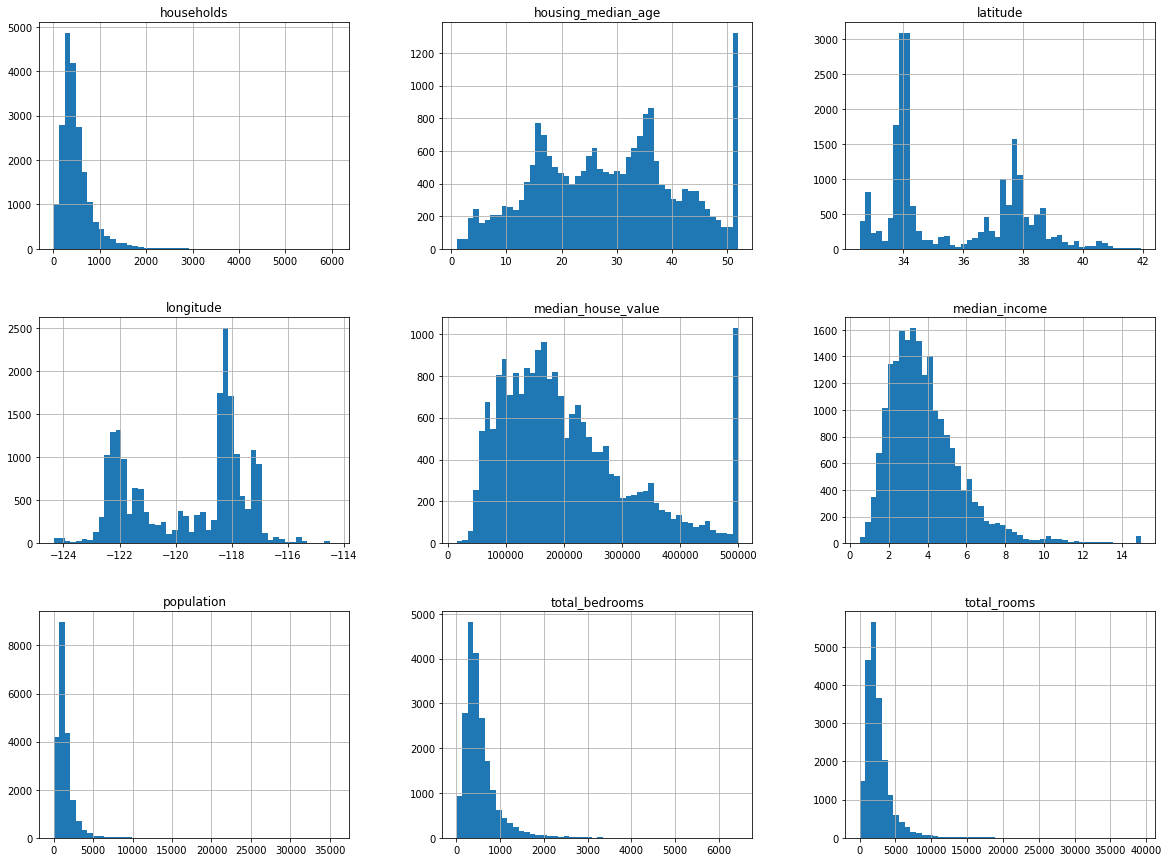

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
import hashlib
import numpy as np


def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
# 给housing添加index
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set), 'train +', len(test_set), "test")

# 也可以使用这种方式来创建id
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

16362 train + 4278 test


In [11]:
# 随机抽样会在某些情况下存在偏差，这时候可以考虑分层抽样，每层的实例个数不能太少，分层不能太多
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print(housing.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0 

In [12]:
# 使用sklearn的tratifiedShuffleSplit类进行分层抽样
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print(housing["income_cat"].value_counts() / len(housing))

# 得到训练集和测试集后删除income_cat
for s in (strat_train_set, strat_test_set):
    s.drop(["income_cat"], axis=1, inplace=True)
    
print(strat_train_set.head(10))

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   

       population

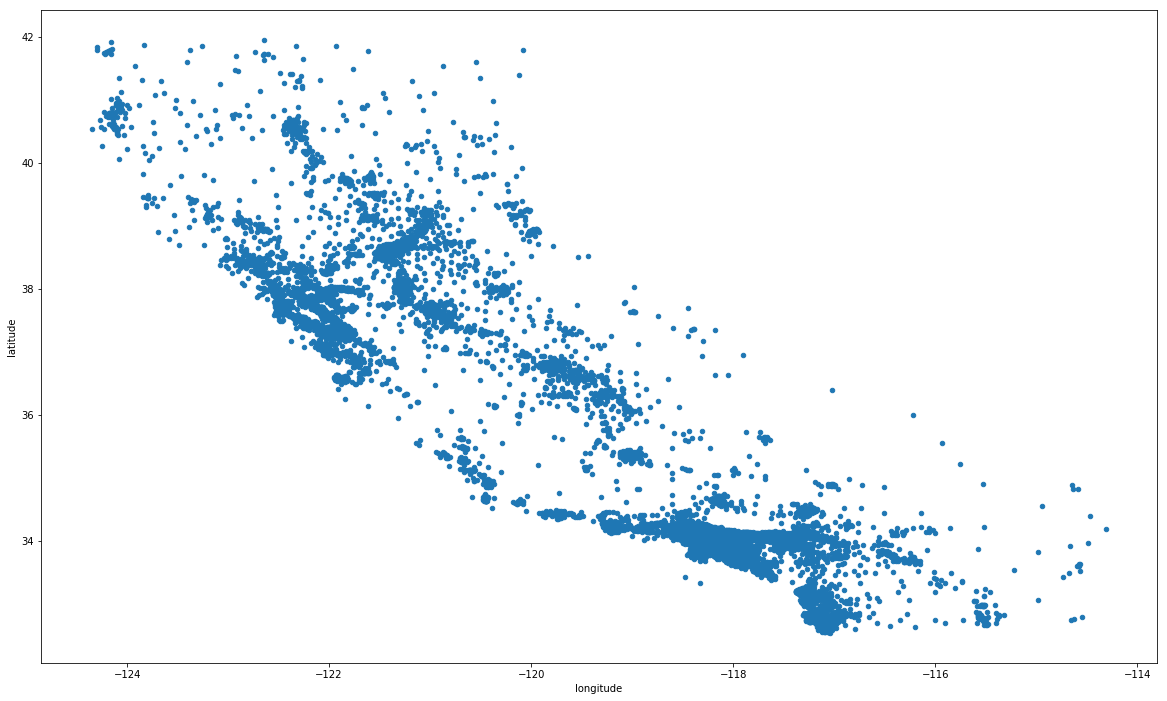

In [13]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(20, 12))

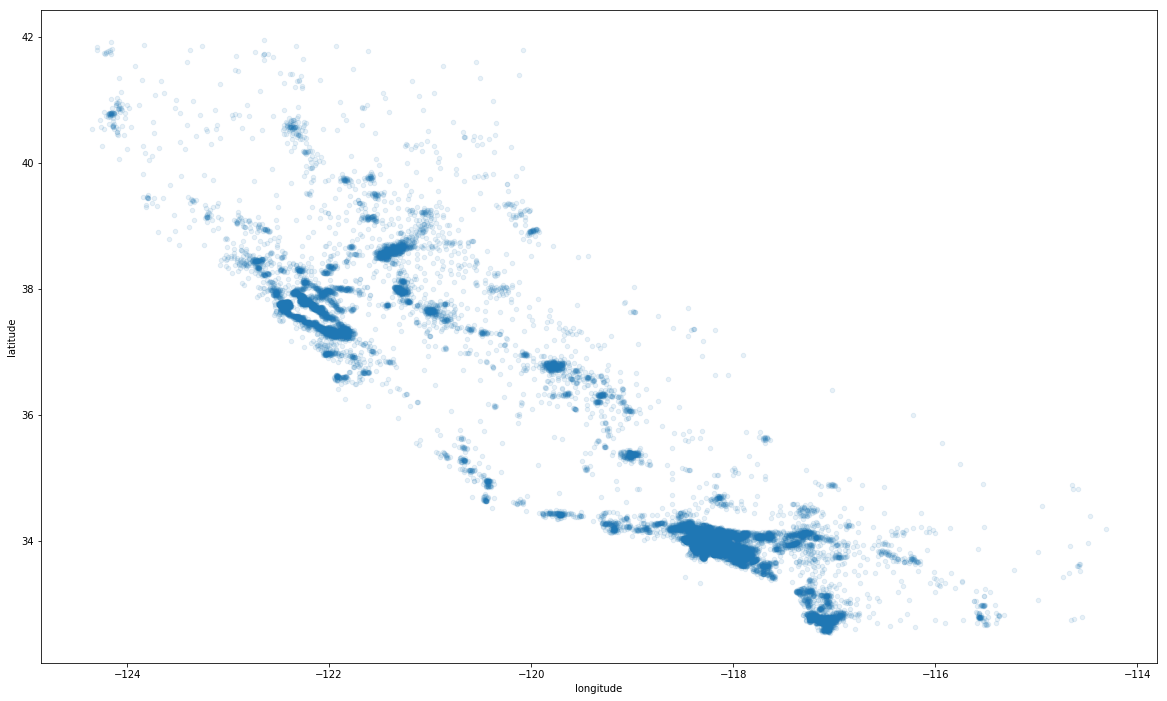

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(20, 12))

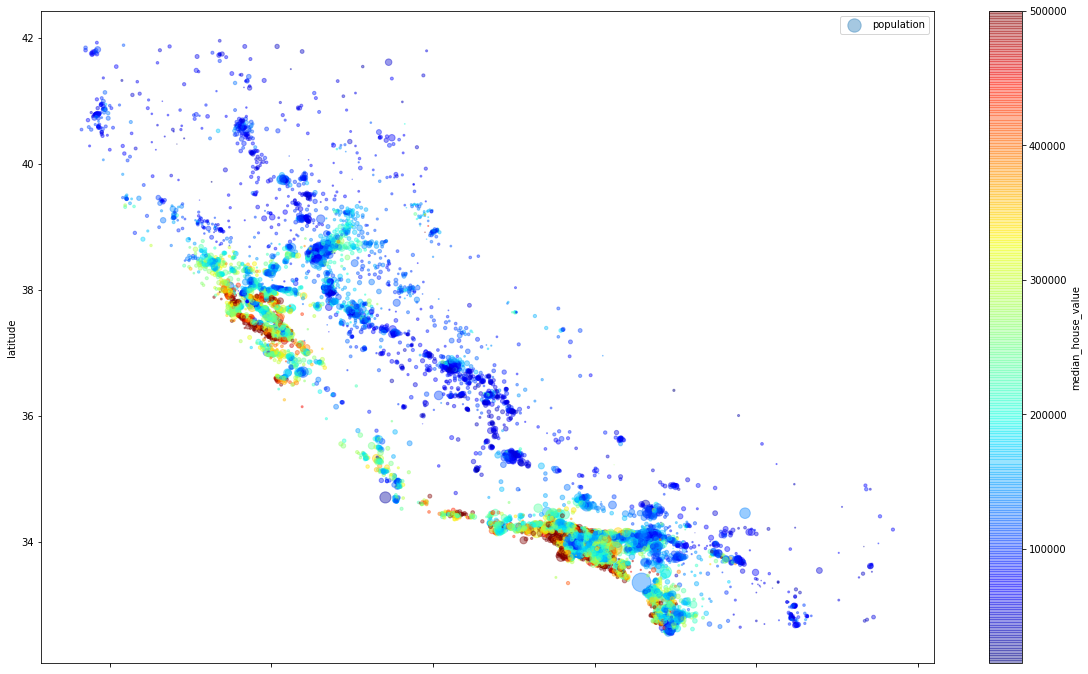

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(20, 12))
plt.legend()

In [16]:
# 标准相关系数， 查看feature的关联度
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

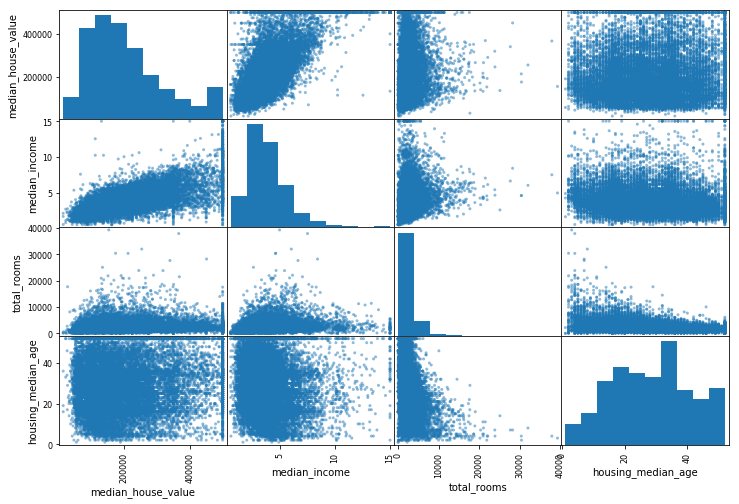

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

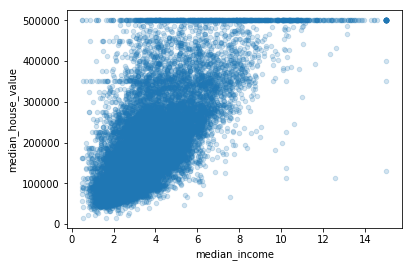

In [18]:
housing.plot(kind='scatter', x='median_income', y="median_house_value", alpha=0.2)
# 图中横线的部分就属于干扰数据，不符合大的趋势

In [19]:
# 有些属性可能是我们不需要的，在这里，bedrooms的总数，不是我们关心的
# 因此我们可以使用已有的一些属性生成新的组合属性
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [20]:
# 分离labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [21]:
# 机器学习算法不能运行在值缺失的情况，因此需要对值缺失做一些处理
# 1. 放弃那一行数据 2. 放弃整个属性 3. 给缺失的值重新赋值
from sklearn.impute import SimpleImputer


# 使用中位数作为策略
imputer = SimpleImputer(strategy="median")
# 移除不是数值类型的项
housing_num = housing.drop("ocean_proximity", axis=1)
# fit只用来计算数据的策略值
imputer.fit(housing_num)
print(imputer.statistics_)
# 转换数据，就是补齐missing value
X = imputer.transform(housing_num)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [22]:
# 对于不是数值的属性值，sk页提供了转换方法
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [23]:
# 在上边的例子中有个很大的问题，ml的算法会任务0和1比较接近，但是<1H OCEAN和NEAR OCEAN更相似
# 为了解决这个问题，需要引入one hot的方式，用所在的位置设为1
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_1hot.toarray())

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
# 也可以把label和one hot的步骤合成一个
from sklearn.preprocessing import LabelBinarizer


encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


In [63]:
# 自定义Transformation
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        print("==============")
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            print("aaaa", np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room][0])
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    

attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
print(len(housing_extra_attribs[0])) # 在每一行的后边拼接了两个值
print(housing_extra_attribs) # 在每一行的后边拼接了两个值

aaaa [-121.89 37.29 38.0 1568.0 351.0 710.0 339.0 2.7042 '<1H OCEAN'
 4.625368731563422 2.094395280235988 0.22385204081632654]
12
[[-121.89 37.29 38.0 ... 4.625368731563422 2.094395280235988
  0.22385204081632654]
 [-121.93 37.05 14.0 ... 6.008849557522124 2.7079646017699117
  0.15905743740795286]
 [-117.2 32.77 31.0 ... 4.225108225108225 2.0259740259740258
  0.24129098360655737]
 ...
 [-116.4 34.09 9.0 ... 6.34640522875817 2.742483660130719
  0.1796086508753862]
 [-118.01 33.82 31.0 ... 5.50561797752809 3.808988764044944
  0.19387755102040816]
 [-122.45 37.77 52.0 ... 4.843505477308295 1.9859154929577465
  0.22035541195476574]]


In [60]:
# 通过pipline可以把该数据清洗的过程统一起来
print(list(housing_num))
print(list(housing))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


In [61]:
# 使用属性组合的方式
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    

class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=None):
        print(self.encoder.transform(x))
        return self.encoder.transform(x)
        

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


num_pipeline = Pipeline([("selector", DataFrameSelector(num_attribs)), 
                         ("imputer", SimpleImputer(strategy="median")), 
                         ("attribs_adder", CombinedAttributesAdder()), 
                          ("std_scaler", StandardScaler())])

cat_pipeline = Pipeline([("selector", DataFrameSelector(cat_attribs)), 
                        ("label_binarizer", CustomLabelBinarizer())])


full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), 
                                               ("cat_pipeline", cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[0])


aaaa [-1.21890000e+02  3.72900000e+01  3.80000000e+01  1.56800000e+03
  3.51000000e+02  7.10000000e+02  3.39000000e+02  2.70420000e+00
  4.62536873e+00  2.09439528e+00  2.23852041e-01]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]
[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
  0.          0.          0.          0.        ]


In [46]:
housing_prepared.shape

(16512, 16)

In [64]:
# 我们先用线性回归模型试一下
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# 准备一些测试数据
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_data_prepared)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t,", list(some_labels))

aaaa [-1.21890000e+02  3.72900000e+01  3.80000000e+01  1.56800000e+03
  3.51000000e+02  7.10000000e+02  3.39000000e+02  2.70420000e+00
  4.62536873e+00  2.09439528e+00  2.23852041e-01]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]]
[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
  -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
   0.          0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
  -1.02222705  1.33645936  0.21768338 -0.03353391 -0.83628902  1.
   0.          0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 -0.31365989 -0.15334458 -0.43363936
  -0.0933178  -0.5320456  -0.46531516 -0.09240499  0.4222004   0.
   0.          0.          0.          1.        ]
 [-0.01706767  0.31357576 -0.29052016 -0.36276217 -0.39675594  0.03604096
  -0.38343559 -1.04556555 -0.07966124  0.08973561 -0.19645314  0.
   1.          0.          0.       

In [66]:
# 使用RMSE测错误
from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # 这种错误误差已经很大，说明当前的features不能提供预测的足够的信息或者当前模型不够强大

68628.19819848923

In [67]:
# 使用决策树来训练数据
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [68]:
# 上边出现了error为0的情况，说明过拟合了，可以使用sk的交叉验证
# 把训练数据分成一定的分数，相互验证
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    
display_scores(tree_rmse_scores)

Scores: [68276.69155785 65638.61053543 70123.84790484 69694.99000224
 70707.06081334 74993.31945804 71183.17382992 72061.99383912
 74817.538983   69769.49161132]
Mean: 70726.67185351078
Standard deviation: 2667.696922477802


In [69]:
# 使用交叉验证看看回归的error
line_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
line_rmse_scores = np.sqrt(-line_scores)


display_scores(line_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


In [70]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor


random_forest = RandomForestRegressor()
random_forest.fit(housing_prepared, housing_labels)

forest_predictions = random_forest.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22100.915917968654

In [71]:
# 使用交叉验证看看随机森林的error
forest_scores = cross_val_score(random_forest, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


display_scores(forest_rmse_scores)

Scores: [53142.71935017 50022.71979794 50923.22891629 54204.88664328
 53064.96336744 55506.02443482 52027.79753948 50361.27632062
 55499.21845985 53756.48748946]
Mean: 52850.932231934436
Standard deviation: 1882.494871073351


In [72]:
# 在得到一系列可用的模型列表后，需要对该模型做微调
# Grid Search 网络搜索，使用sk对各种不同的参数组合做训练，获取最佳参数组合
from sklearn.model_selection import GridSearchCV


param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
# 获取最优的estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64014.84127270588 {'max_features': 2, 'n_estimators': 3}
55638.22227886627 {'max_features': 2, 'n_estimators': 10}
52567.16880042681 {'max_features': 2, 'n_estimators': 30}
59983.83361087944 {'max_features': 4, 'n_estimators': 3}
52740.766710888834 {'max_features': 4, 'n_estimators': 10}
50598.47043554242 {'max_features': 4, 'n_estimators': 30}
58854.83605491755 {'max_features': 6, 'n_estimators': 3}
52269.41928414714 {'max_features': 6, 'n_estimators': 10}
50213.453819948416 {'max_features': 6, 'n_estimators': 30}
58626.76382900356 {'max_features': 8, 'n_estimators': 3}
51995.34196545948 {'max_features': 8, 'n_estimators': 10}
50041.41261851009 {'max_features': 8, 'n_estimators': 30}
61912.284073703355 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54649.626505805776 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59874.8623917336 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52065.39507896351 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [75]:
# 使用最终的模型来评估测试数据
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


aaaa [-1.18390000e+02  3.41200000e+01  2.90000000e+01  6.44700000e+03
  1.01200000e+03  2.18400000e+03  9.60000000e+02  8.28160000e+00
  6.71562500e+00  2.27500000e+00  1.56972235e-01]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


47732.7520382174